# Manipulating geographic regions

There are a few operations you can perform on the geographic regions to manipulate them, as demonstrated here.

In [1]:
from polartoolkit import fetch, maps, regions

In [2]:
import os

# set default to northern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

## Combining regions

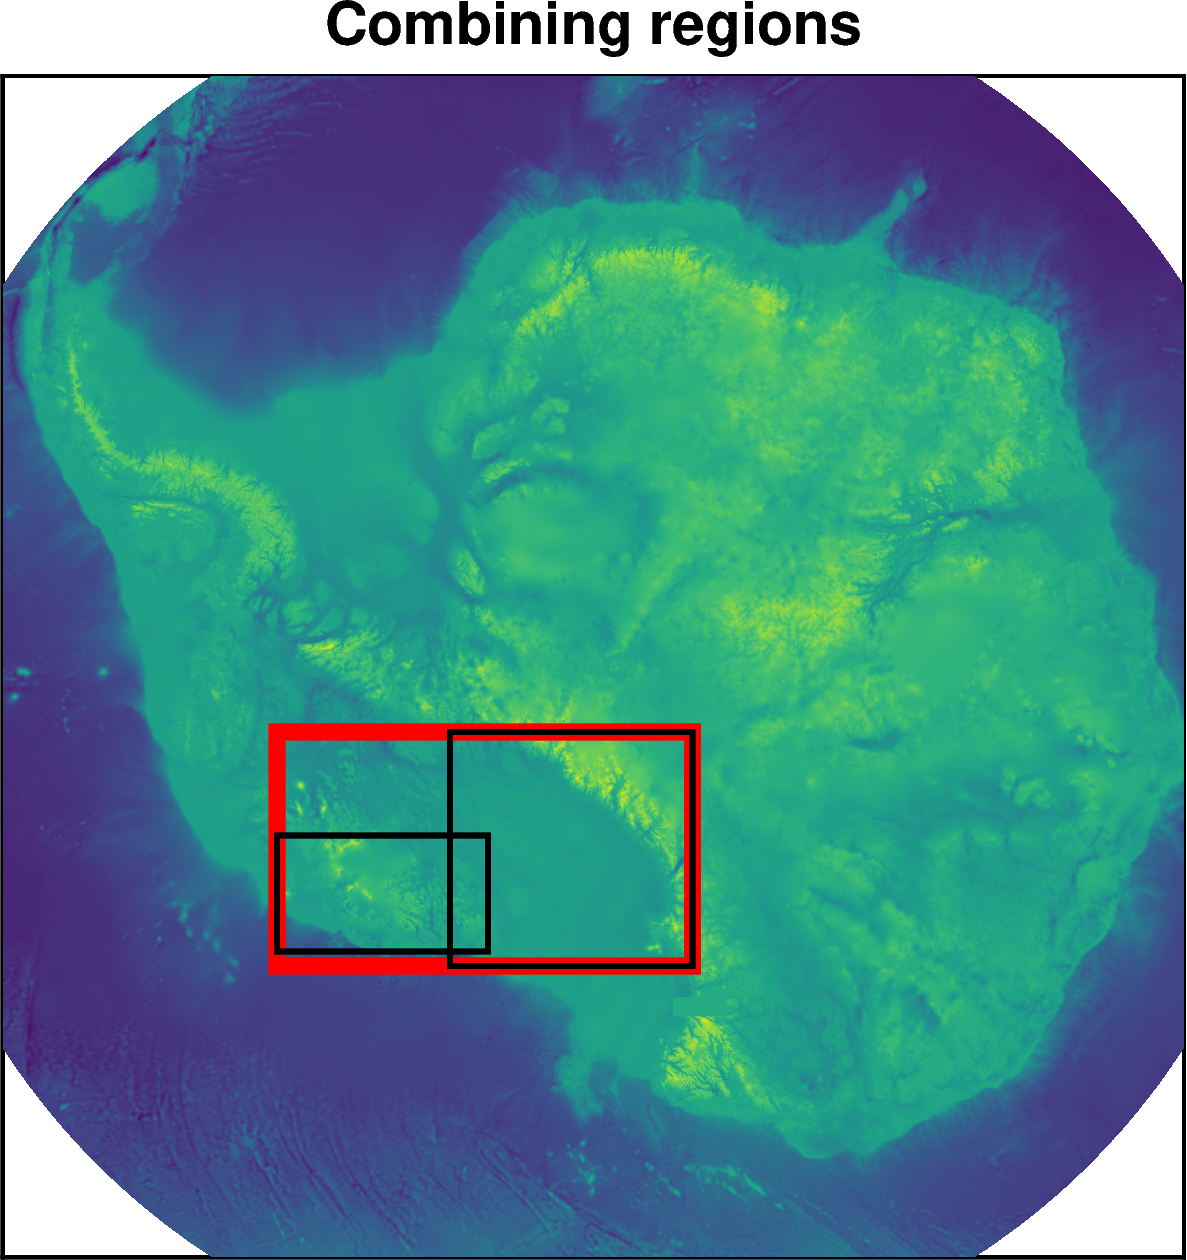

In [3]:
# define two regions
RIS = regions.ross_ice_shelf
MBL = regions.marie_byrd_land

# get the bounding region of both
combined = regions.combine_regions(RIS, MBL)

# make a basemap
fig = maps.plot_grd(
    fetch.bedmap2(layer="bed"),
    region=regions.antarctica,
    colorbar=False,
    title="Combining regions",
)
# plot the three regions
fig.add_box(combined, pen="6p,red")
fig.add_box(RIS)
fig.add_box(MBL)

fig.show(dpi=200)

## Get overlap of two regions

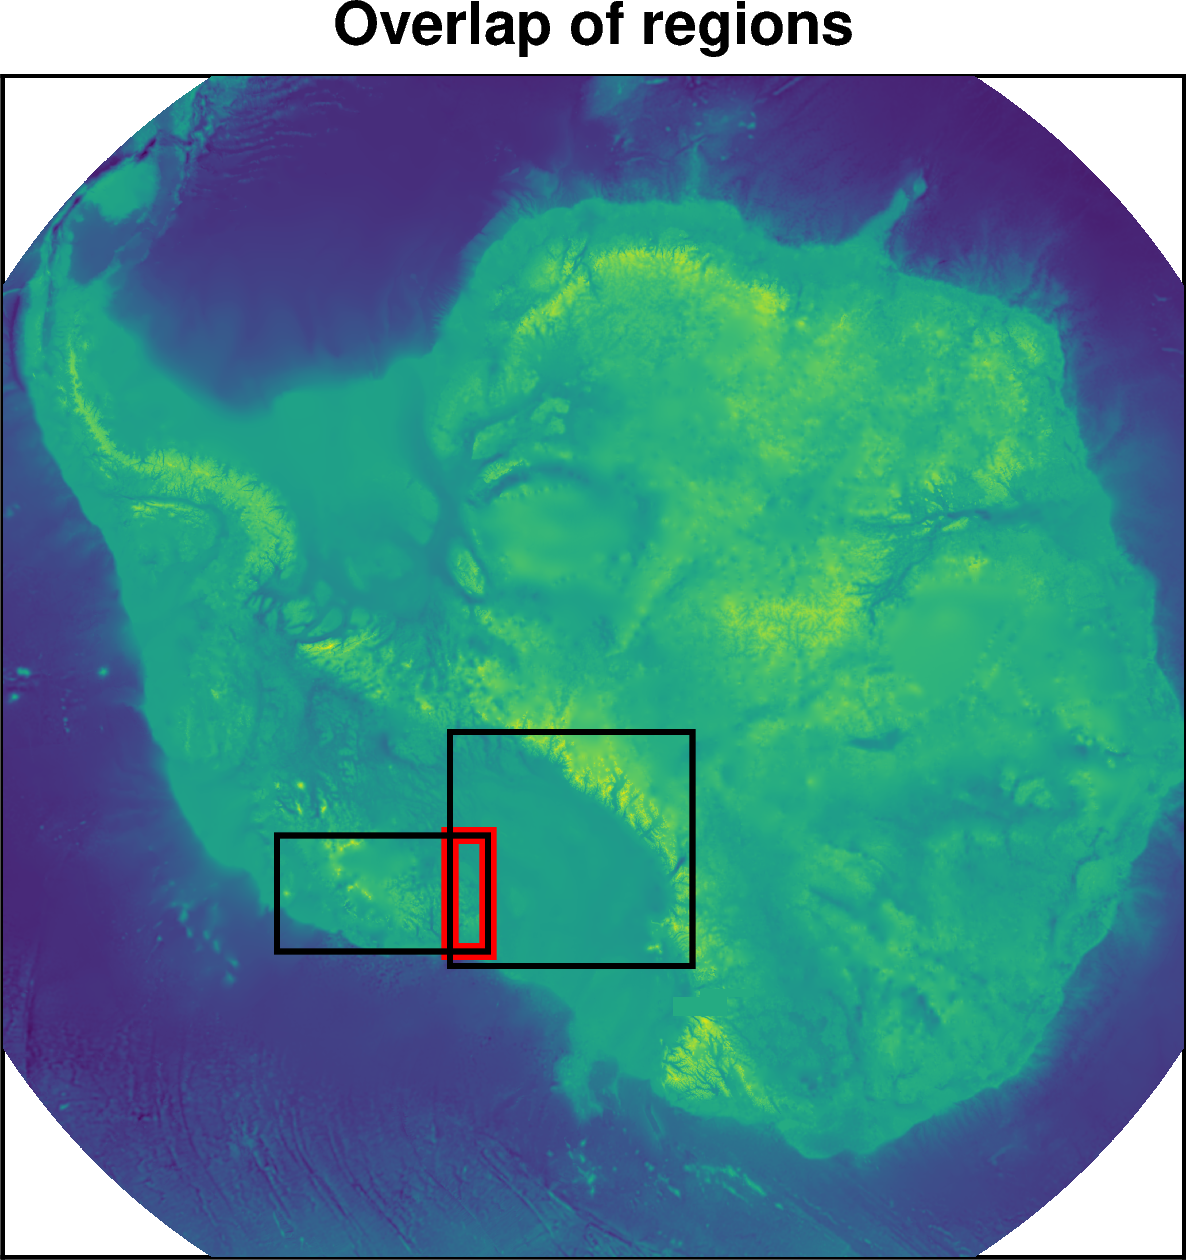

In [4]:
# define two regions
RIS = regions.ross_ice_shelf
MBL = regions.marie_byrd_land

# get the intersecting region of both
overlap = regions.regions_overlap(RIS, MBL)

# make a basemap
fig = maps.plot_grd(
    fetch.bedmap2(layer="bed"),
    region=regions.antarctica,
    colorbar=False,
    title="Overlap of regions",
)
# plot the three regions
fig.add_box(overlap, pen="6p,red")
fig.add_box(RIS)
fig.add_box(MBL)

fig.show(dpi=200)

## Alter region
You can use the `regions.alter_region` function to zoom in or out, or shift the region north, south, east or west. 

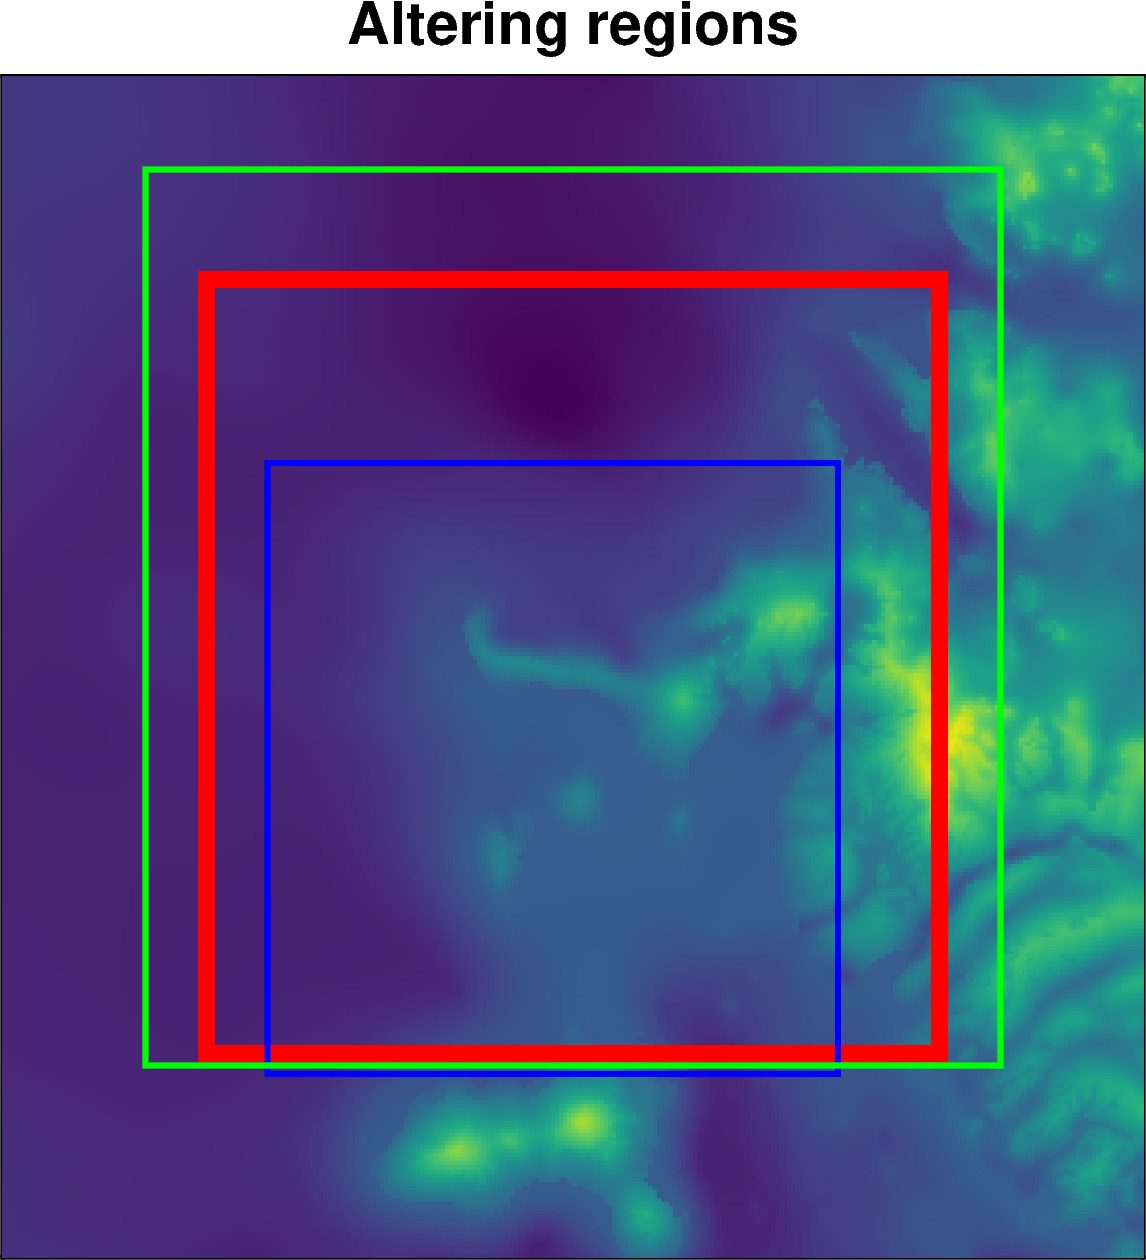

In [5]:
# define a starting region
reg = regions.minna_bluff

# zoom in 20km and shift 25km north and 5km east
new_reg = regions.alter_region(reg, zoom=20e3, n_shift=25e3, w_shift=-5e3)

# zoom out 15km and shift 12km south
new_reg2 = regions.alter_region(
    reg,
    zoom=-15e3,
    n_shift=-12e3,
)

# make a basemap
fig = maps.plot_grd(
    fetch.bedmap2(layer="bed"),
    region=regions.alter_region(reg, zoom=-50e3),
    colorbar=False,
    title="Altering regions",
)
# plot the three regions
fig.add_box(reg, pen="6p,red")
fig.add_box(new_reg, pen="2p,blue")
fig.add_box(new_reg2, pen="2p,green")

fig.show(dpi=200)